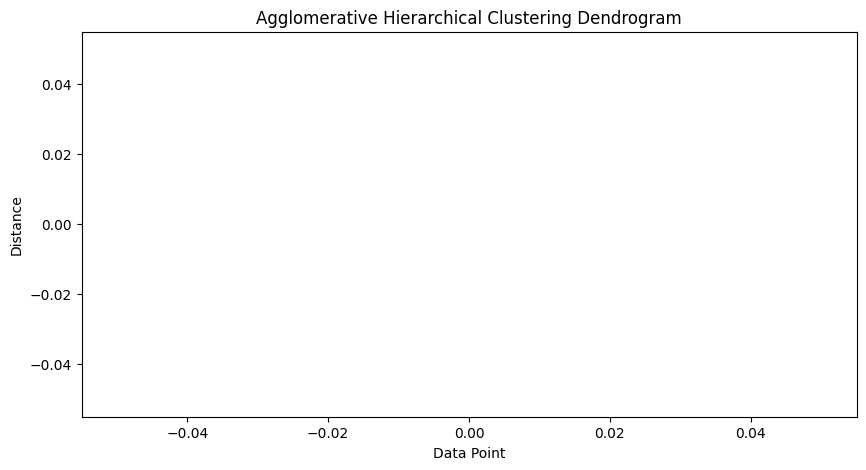

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data points (you can use your own dataset)
data = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [8, 9]])

# Function to compute Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Initialize clusters, each data point initially belongs to its own cluster
clusters = [[point] for point in data]

# Initialize distances between clusters
distances = np.zeros((len(data), len(data)))

# Calculate the distances between all pairs of clusters
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        dist = min(euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j])
        distances[i, j] = distances[j, i] = dist

# Dendrogram to store the history of merging
dendrogram = []

# Perform agglomerative clustering
while len(clusters) > 1:
    min_dist = np.min(distances)
    i, j = np.where(distances == min_dist)
    i, j = i[0], j[0]

    # Merge clusters i and j
    clusters[i].extend(clusters[j])
    del clusters[j]
    
    # Update distances and dendrogram
    new_distances = np.zeros((len(clusters), len(clusters)))
    for k in range(len(clusters)):
        for l in range(k + 1, len(clusters)):
            new_dist = min(euclidean_distance(p1, p2) for p1 in clusters[k] for p2 in clusters[l])
            new_distances[k, l] = new_distances[l, k] = new_dist
    distances = new_distances
    dendrogram.append([i, j, min_dist, len(clusters)])

# Create the dendrogram
dendrogram = np.array(dendrogram)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Data Point")
plt.ylabel("Distance")
plt.hlines(y=dendrogram[:, 2], xmin=dendrogram[:, 0], xmax=dendrogram[:, 1], color='b')
plt.show()


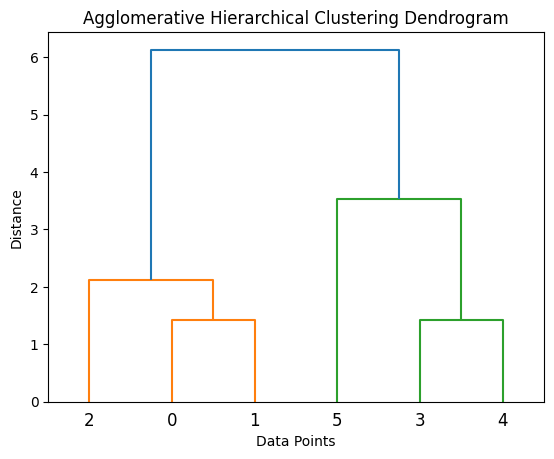

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Sample data points (you can use your own dataset)
data = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [8, 9]])

# Calculate the pairwise Euclidean distances
distances = pdist(data)

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='average')  # You can choose different linkage methods

# Create a dendrogram
dendrogram(linkage_matrix)

# Customize the dendrogram plot
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Show the dendrogram
plt.show()


In [14]:
from pyclustering.cluster.diana import diana
from pyclustering.cluster import cluster_visualizer
import numpy as np

# Sample data (you can use your own dataset)
data = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [8, 9]])

# Perform Diana clustering
diana_instance = diana(data)
diana_instance.process()

# Get cluster results
clusters = diana_instance.get_clusters()

# Create a visualizer to visualize the results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show()

# Optionally, you can get cluster centers
cluster_centers = diana_instance.get_centers()
print("Cluster Centers:")
for center in cluster_centers:
    print(center)


ModuleNotFoundError: No module named 'pyclustering.cluster.diana'

In [13]:
pip install --upgrade pyclustering

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
